In [3]:
import math
import pandas as pd

import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import tpot

In [4]:
mean = pd.read_pickle("../dataset_means_stds/bg_mean.pkl")
std = pd.read_pickle("../dataset_means_stds/bg_std.pkl")
data_train_scaled = pd.read_csv("../scaled_featurized_train/scaled_bg_train.csv", index_col=0)
data_test_scaled = pd.read_csv("../scaled_featurized_test/scaled_bg_test.csv", index_col=0)
data_train = (data_train_scaled * std) + mean
data_test = (data_test_scaled * std) + mean

In [7]:
data_train.head()

std

bandgap (eV)               1.492272
ave:atomic_volume          4.122994
ave:atomic_weight         39.716655
ave:boiling_point        809.860797
ave:bulk_modulus          37.970849
                            ...    
sine_eigenspectrum_35    166.200789
sine_eigenspectrum_36    117.393914
sine_eigenspectrum_37    117.197974
sine_eigenspectrum_38    116.739198
sine_eigenspectrum_39      0.006568
Length: 77, dtype: float64

In [4]:
model = tpot.TPOTRegressor(
    generations=None,
    population_size=100,
    max_eval_time_mins=1/60,
    max_time_mins=10,
    cv=10,
    verbosity=2,
    scoring="neg_root_mean_squared_error",
    config_dict=tpot.config.regressor_config_dict,
    n_jobs=-1,
    random_state=1234
)

In [8]:
target = "bandgap (eV)"
train_x = data_train_scaled.drop(columns=[target]).to_numpy()
train_y = data_train_scaled[target].to_numpy().ravel()

test_x = data_test_scaled.drop(columns=[target]).to_numpy()
test_y = data_test_scaled[target].to_numpy().ravel()

model.fit(train_x, train_y)

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.6525437481239298

Generation 2 - Current best internal CV score: -0.6468299506526606

Generation 3 - Current best internal CV score: -0.6468299506526606

Generation 4 - Current best internal CV score: -0.6398105917579338

Generation 5 - Current best internal CV score: -0.6398105917579338

Generation 6 - Current best internal CV score: -0.6398105917579338

Generation 7 - Current best internal CV score: -0.6301876046520947

Generation 8 - Current best internal CV score: -0.6301876046520947

Generation 9 - Current best internal CV score: -0.6301876046520947

Generation 10 - Current best internal CV score: -0.6301876046520947

Generation 11 - Current best internal CV score: -0.6301876046520947

Generation 12 - Current best internal CV score: -0.6301876046520947

Generation 13 - Current best internal CV score: -0.6301876046520947

Generation 14 - Current best internal CV score: -0.6301876046520947

Generation 15 - Current best internal CV s

TPOTRegressor(config_dict={'sklearn.cluster.FeatureAgglomeration': {'affinity': ['euclidean',
                                                                                 'l1',
                                                                                 'l2',
                                                                                 'manhattan',
                                                                                 'cosine'],
                                                                    'linkage': ['ward',
                                                                                'complete',
                                                                                'average']},
                           'sklearn.decomposition.FastICA': {'tol': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])},
                           'sklearn.decomposition.PCA': {'iter

In [9]:
def unscale(arr):
    return arr * std[target] + mean[target]
    
train_pred_y = model.predict(train_x)
test_pred_y = model.predict(test_x)

In [12]:
models = {}

models["r1_1term"] = lambda df: 5.482132320909957e-03 + 3.278643371383011e-01 * (df["ave:en_ghosh"] - df["ave:density"])
models["r1_2term"] = lambda df: -4.608150625850920e-01 + 3.272946916567465e-01 * np.exp(-df["ave:density"]) + \
                                 2.996458319104499e-01 * (df["ave:en_ghosh"] - df["ave:density"])
models["r2_1term"] = lambda df: -4.282838209517619e-01 + 3.031381295978055e-01 * ((df["ave:gs_energy"] + df["ave:en_ghosh"]) * np.exp(-df["ave:density"]))

data_train_scaled_sisso = data_train_scaled.copy()
data_test_scaled_sisso = data_test_scaled.copy()
for key,fun in models.items():
    data_train_scaled_sisso[key] = fun(data_train_scaled_sisso)
    data_test_scaled_sisso[key] = fun(data_test_scaled_sisso)

data_train_scaled_sisso.head()

,bandgap (eV),ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:density,ave:dipole_polarizability,ave:electron_negativity,ave:electron_affinity,...,sine_eigenspectrum_33,sine_eigenspectrum_34,sine_eigenspectrum_35,sine_eigenspectrum_36,sine_eigenspectrum_37,sine_eigenspectrum_38,sine_eigenspectrum_39,r1_1term,r1_2term,r2_1term
1656,0.561702,-0.578244,-0.871364,-0.433357,0.525954,-0.713356,-0.802687,-0.937082,1.030137,-0.280519,...,-0.048055,-0.046353,-0.045695,-0.03234,-0.032276,-0.031983,-0.016855,0.638273,0.847881,0.080586
3686,-0.434296,-1.033415,-1.140941,-0.481247,0.637410,-0.079727,-0.745851,0.328886,0.103772,-0.650320,...,-0.048055,-0.046353,-0.045695,-0.03234,-0.032276,-0.031983,-0.016855,0.243452,0.446687,-1.035537
2788,2.017134,0.771908,0.238017,-0.053165,-0.718369,1.596281,-0.345185,0.947585,0.109312,0.403640,...,-0.048055,-0.046353,-0.045695,-0.03234,-0.032276,-0.031983,-0.016855,0.264024,0.237697,-0.106721
3631,1.608495,-0.250003,-0.914063,-0.461036,0.378048,-0.509957,-0.775299,-0.672148,1.908983,1.142635,...,-0.048055,-0.046353,-0.045695,-0.03234,-0.032276,-0.031983,-0.016855,0.853609,1.024951,0.839488
3531,-0.775387,1.095298,0.507738,-1.007650,-0.700812,0.397833,-0.319454,0.391646,0.197332,-0.008089,...,-0.048055,-0.046353,-0.045695,-0.03234,-0.032276,-0.031983,-0.016855,0.391842,0.342773,0.370215


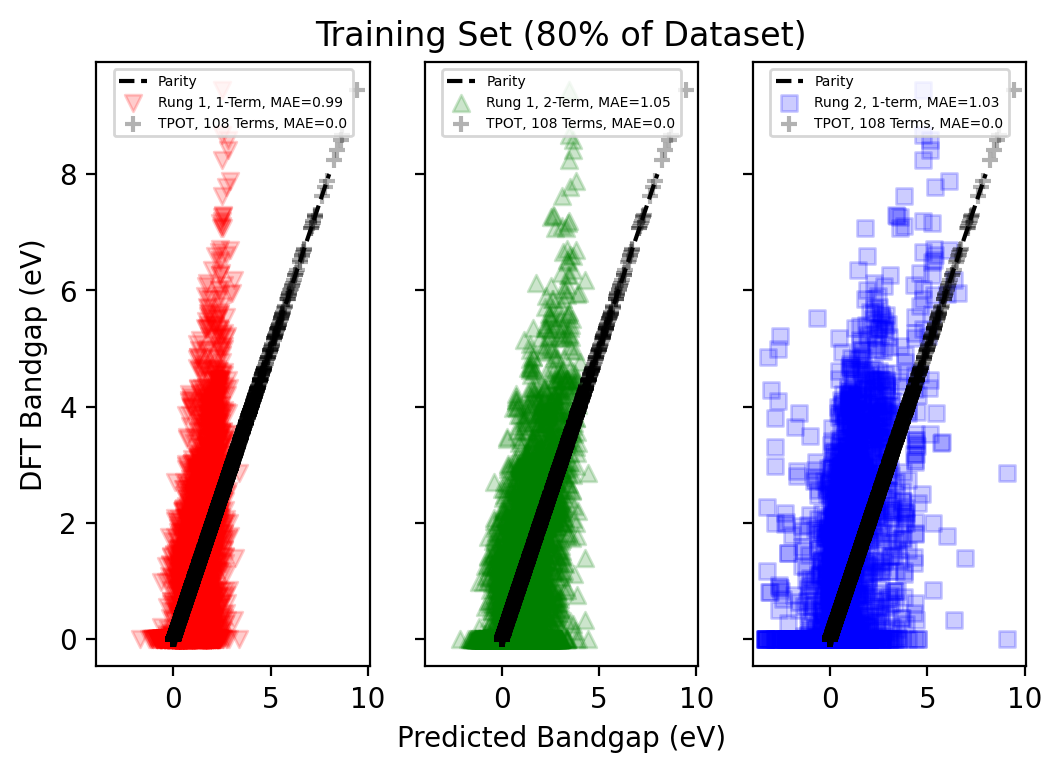

In [31]:
tpot_mape =  np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(train_y), y_pred=unscale(train_pred_y)),2)
r1_1t_mape = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(train_y), y_pred=unscale(data_train_scaled_sisso["r1_1term"])),2)
r1_2t_mape = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(train_y), y_pred=unscale(data_train_scaled_sisso["r1_2term"])),2)
r2_1t_mape = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(train_y), y_pred=unscale(data_train_scaled_sisso["r2_1term"])),2)

plt.rcParams["figure.dpi"]=200
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True)
ax1.set_ylabel("DFT Bandgap (eV)")
ax2.set_xlabel("Predicted Bandgap (eV)")


    
ax1.scatter(x=unscale(data_train_scaled_sisso["r1_1term"]), y=unscale(train_y), marker="v", color="red",alpha=0.2, label=f"Rung 1, 1-Term, MAE={r1_1t_mape}")
ax2.scatter(x=unscale(data_train_scaled_sisso["r1_2term"]), y=unscale(train_y), marker="^", color="green", alpha=0.2, label=f"Rung 1, 2-Term, MAE={r1_2t_mape}")
ax3.scatter(x=unscale(data_train_scaled_sisso["r2_1term"]), y=unscale(train_y), marker="s", color="blue", alpha=0.2, label=f"Rung 2, 1-term, MAE={r2_1t_mape}")
for ax in (ax1, ax2, ax3):
    ax.scatter(x=unscale(train_pred_y), y=unscale(train_y), color="black", alpha=0.3, marker="+", label=f"TPOT, 108 Terms, MAE={tpot_mape}")
    ax.plot([0, 8], [-0, 8], color="black", linestyle="--", label="Parity")
    
for ax in (ax1, ax2, ax3):
    ax.legend(prop={"size":5}, loc="upper center")

ax2.set_title("Training Set (80% of Dataset)")
plt.show()

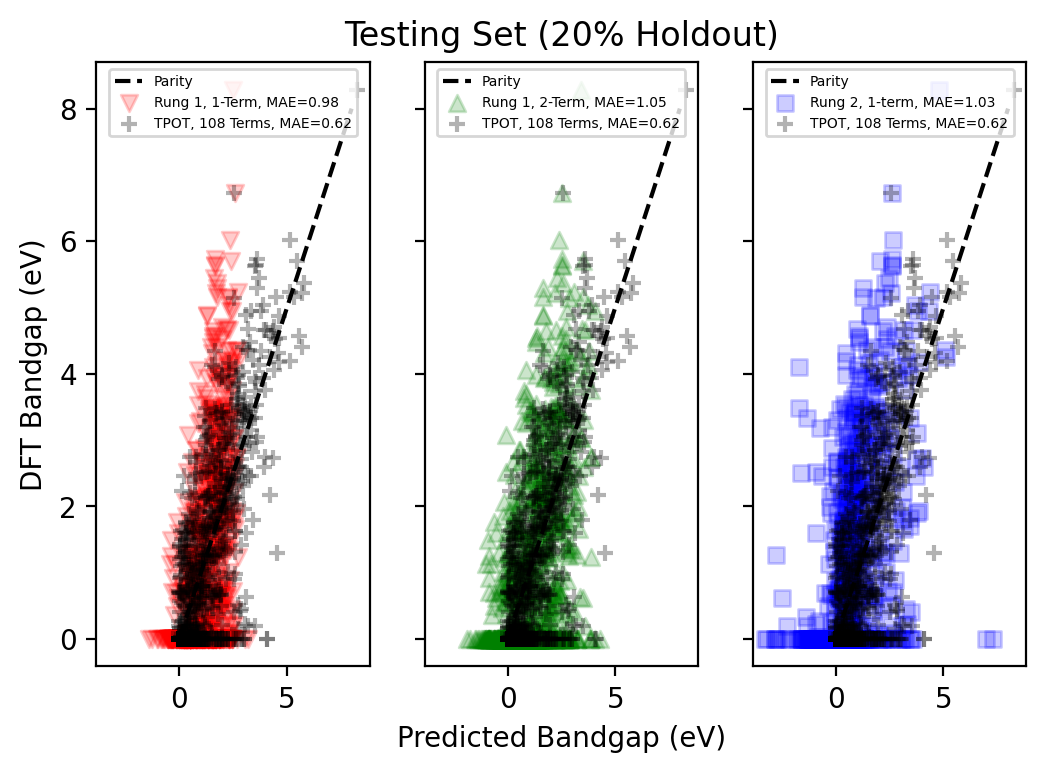

In [32]:
tpot_mape =  np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(test_y), y_pred=unscale(test_pred_y)),2)
r1_1t_mape = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(test_y), y_pred=unscale(data_test_scaled_sisso["r1_1term"])),2)
r1_2t_mape = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(test_y), y_pred=unscale(data_test_scaled_sisso["r1_2term"])),2)
r2_1t_mape = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(test_y), y_pred=unscale(data_test_scaled_sisso["r2_1term"])),2)

plt.rcParams["figure.dpi"]=200
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True)
ax1.set_ylabel("DFT Bandgap (eV)")
ax2.set_xlabel("Predicted Bandgap (eV)")
 
ax1.scatter(x=unscale(data_test_scaled_sisso["r1_1term"]), y=unscale(test_y), marker="v", color="red",alpha=0.2, label=f"Rung 1, 1-Term, MAE={r1_1t_mape}")
ax2.scatter(x=unscale(data_test_scaled_sisso["r1_2term"]), y=unscale(test_y), marker="^", color="green", alpha=0.2, label=f"Rung 1, 2-Term, MAE={r1_2t_mape}")
ax3.scatter(x=unscale(data_test_scaled_sisso["r2_1term"]), y=unscale(test_y), marker="s", color="blue", alpha=0.2, label=f"Rung 2, 1-term, MAE={r2_1t_mape}")
for ax in (ax1, ax2, ax3):
    ax.scatter(x=unscale(test_pred_y), y=unscale(test_y), color="black", alpha=0.3, marker="+", label=f"TPOT, 108 Terms, MAE={tpot_mape}")
    ax.plot([0, 8], [0, 8], color="black", linestyle="--", label="Parity")

ax2.set_title("Testing Set (20% Holdout)")
for ax in (ax1, ax2, ax3):
    ax.legend(prop={"size":5}, loc="upper center")

plt.show()

In [40]:
model.fitted_pipeline_

Pipeline(steps=[('minmaxscaler-1', MinMaxScaler()),
                ('variancethreshold', VarianceThreshold(threshold=0.005)),
                ('minmaxscaler-2', MinMaxScaler()),
                ('stackingestimator',
                 StackingEstimator(estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ])))),
                ('selectpercentile',
                 SelectPercentile(percentile=47,
                                  score_func=<function f_regression at 0x13824c940>)),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=15, p=1, weights='distance'))])

In [43]:
sum(model.fitted_pipeline_[4].get_support())

26

# model.fitted_pipeline_[3].__dict__